# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [MARGOHAN L. SIRINGO-RINGO]
- **Email:** [mc009d5y2431@student.devacademy.id]
- **ID Dicoding:** [MC009D5Y2431]



## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda sepanjang waktu?
- Seberapa besar pengaruh faktor cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda?
- Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan atau hari libur?
- Pada jam berapa penggunaan sepeda mencapai puncaknya, dan bagaimana perbedaannya antara pengguna kasual dan terdaftar?
Apakah terdapat perbedaan pola penggunaan sepeda di berbagai musim?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

Mengumpulkan semua data yang dibutuhkan:
1. day.csv

In [10]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kode diatas akan menampilkan data day.csv yang kita ambil dan akan menampilkan 5 data teratas.

In [11]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode diatas akan menampilkan data hour.csv yang kita ambil dan akan menampilkan 5 data teratas.

### Assessing Data

1. Menilai data day.csv

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dilihat dari kode diatas, tidak terdapat missing value didalamnya tetapi terdapat kesalahan tipe data pada kolom "dteday" seharusnya menggunakan tipe data datetime.

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat dulikasi pada kode diatas(day.csv).

2. Menilai data hour.csv

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama seperti dataset day.csv, pada hour.csv tidak terdapat missing value tetapi terdapat kesalahan tipe data pada "dteday" yang seharusnya menggunakan tipe data datetime.

In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data ini aman tanpa ada duplikasi.

### Cleaning Data

Membersihkan data pada day_df dan hour_df.

1. day_df

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Disini tipe data dteday pada dya_df sudah diganti dari object menjadi datetime.

2. hour_df

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan rangkuman data day_df, kita dapat melihat info yang sangat banyak dan penting salah satunya seperti perbandingan peminjaman pada kolom holiday dan weekday dimana weekday memiliki rata-rata peminjaman tertinggi 2,99 dibandingkan holiday 0,02 saja.

Kita akan melihat (mendemografikan) beberapa faktor yang bisa kita analisis lebih lanjut.

1. Peminjaman Sepeda Berdasarkan Musim(Season)

In [21]:
day_df.groupby('season').agg({
    'cnt': ['mean', 'median', 'std', 'min', 'max']
})

cnt                                 
               mean  median          std   min   max
season                                              
1       2604.132597  2209.0  1399.942119   431  7836
2       4992.331522  4941.5  1695.977235   795  8362
3       5644.303191  5353.5  1459.800381  1115  8714
4       4728.162921  4634.5  1699.615261    22  8555

- Season 1 = musim semi
- Season 2 = musim panas
- Season 3 = musim gugur
- Season 4 = musim dingin

Dapat disimpulkan bahwa:
- pada season 3 memiliki rata-rata total peminjaman tertinggi dengan 5644 sepeda per hari.
- Season 1 memiliki rata-rata peminjaman terendah dengan 2604 sepeda perhari.
- Standar deviasi lebih tinggi dimusim panas(season 2) dan musim gugur(season 3).
- Peminjaman sepeda minimum terjadi dimusim dingin (season 4) hanya 22 sepeda yang disewa, kemungkinan karena cuaca ekstrem.

2.Peminjaman Sepeda Berdasarkan Hari Kerja

In [22]:
day_df.groupby('workingday').agg({
    'casual': ['mean', 'median'],
    'registered': ['mean', 'median'],
    'cnt': ['mean', 'median']
})


casual           registered                  cnt        
                   mean  median         mean  median         mean  median
workingday                                                               
0           1371.134199  1338.0  2959.034632  2928.0  4330.168831  4459.0
1            606.570000   616.5  3978.250000  3866.0  4584.820000  4582.0

Kesimpulan:
- Pengguna kasual lebih sering menyewa sepeda di akhir pekan (rata-rata 1371 sewa/hari) dibandingkan hari kerja (606 sewa/hari).
- Pengguna terdaftar lebih aktif di hari kerja dengan rata-rata 3978 sewa/hari, dibandingkan dengan akhir pekan yang hanya 2959 sewa/hari.
- Jumlah total peminjaman pada hari kerja dan akhir pekan hampir sama, tetapi pola penggunaannya berbeda (kasual vs. terdaftar).

3. Pengaruh Cuaca (weathersit) terhadap Peminjaman

In [23]:
day_df.groupby('weathersit').agg({
    'cnt': ['mean', 'median', 'std', 'min', 'max']
})

cnt                                
                   mean  median          std  min   max
weathersit                                             
1           4876.786177  4844.0  1879.483989  431  8714
2           4035.862348  4040.0  1809.109918  605  8362
3           1803.285714  1817.0  1240.284449   22  4639

Kesimpulan:

- Cuaca cerah (weathersit=1) memiliki rata-rata peminjaman tertinggi (4876 sewa/hari).
- Cuaca buruk (weathersit=3) drastis menurunkan peminjaman (1803 sewa/hari), dengan minimum hanya 22 sepeda dalam satu hari.

Variasi peminjaman lebih besar dalam kondisi cuaca yang lebih baik, menunjukkan bahwa orang lebih aktif bersepeda saat cuaca cerah.

4. Distribusi Peminjaman Sepeda Berdasarkan Bulan (mnth)

In [24]:
day_df.groupby('mnth').agg({
    'cnt': ['mean', 'median', 'std', 'min', 'max']
})

cnt                                 
             mean  median          std   min   max
mnth                                              
1     2176.338710  1939.0  1161.674370   431  4521
2     2655.298246  2402.0  1145.313307  1005  5062
3     3692.258065  3216.5  1899.301812   605  8362
4     4484.900000  4293.5  1776.160778   795  7460
5     5349.774194  4890.5  1298.711561  2633  8294
6     5772.366667  5308.5  1240.400031  3767  8120
7     5563.677419  5446.5  1273.751871  3285  8173
8     5664.419355  5229.5  1494.516146  1115  7865
9     5766.516667  5384.0  1810.130649  1842  8714
10    5199.225806  5013.0  1988.392517    22  8156
11    4247.183333  4081.0  1285.712709  1495  6852
12    3403.806452  3444.0  1549.639353   441  6606

Kesimpulan:

- Peminjaman sepeda meningkat dari Januari ke September dengan puncaknya pada September (5766 sewa/hari).
- Musim dingin (Desember - Februari) memiliki peminjaman terendah, dengan Januari menjadi bulan paling sepi (2176 sewa/hari).
- September memiliki peminjaman tertinggi (maksimum 8714 sewa dalam satu hari).

In [25]:
month_rental_distribution = day_df.groupby('mnth').agg({'cnt': 'sum'}).sort_values(by='cnt', ascending=False).reset_index()


In [26]:
month_rental_distribution

,mnth,cnt
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


Kesimpulan:
- Agustus memiliki total peminjaman tertinggi (351.194 kali) diikuti oleh Juni (346.342 kali) dan September (345.991 kali).
- Januari memiliki total peminjaman terendah (134.933 kali), kemungkinan karena musim dingin.
- Bulan-bulan musim panas (Mei-September) memiliki peminjaman tertinggi, menunjukkan pola penggunaan yang meningkat saat cuaca lebih hangat.

In [27]:
weather_rental_distribution = day_df.groupby('weathersit').agg({'cnt': 'sum'}).sort_values(by='cnt', ascending=False).reset_index()

In [28]:
weather_rental_distribution

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


Kesimpulan:
- Cuaca cerah (weathersit=1) memiliki total peminjaman tertinggi (2.257.952 kali).
- Cuaca berkabut atau sedikit mendung (weathersit=2) memiliki peminjaman yang jauh lebih rendah (996.858 kali).
- Cuaca buruk seperti hujan dan salju ringan (weathersit=3) memiliki peminjaman paling sedikit (37.869 kali), yang menunjukkan bahwa cuaca ekstrem sangat mempengaruhi keputusan pengguna untuk menyewa sepeda.

###Explore data hour_df

In [29]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Pada data hour_df ini dapat kita lihat info yang menarik juga seperti pada total peminjaman dengan nilai min = 1 dan max nya 977 per jam dan masih banyak info lain yang akan kita demografikan.

1. Peminjaman Berdasarkan Jam (hr)

In [30]:
hour_df.groupby('hr').agg({
    'casual': ['mean', 'median'],
    'registered': ['mean', 'median'],
    'cnt': ['mean', 'median']
})

casual         registered                cnt       
         mean median        mean median        mean median
hr                                                        
0   10.158402    7.0   43.739669   32.0   53.898072   40.0
1    6.504144    4.0   26.871547   15.0   33.375691   20.0
2    4.772028    2.0   18.097902    8.0   22.869930   11.0
3    2.715925    1.0    9.011478    5.0   11.727403    6.0
4    1.253945    1.0    5.098996    5.0    6.352941    6.0
5    1.411437    1.0   18.478382   17.0   19.889819   19.0
6    4.161379    3.0   71.882759   73.0   76.044138   76.0
7   11.055021   10.0  201.009629  202.0  212.064649  208.0
8   21.679505   21.0  337.331499  361.0  359.011004  385.0
9   30.891334   26.0  188.418157  180.0  219.309491  216.0
10  46.477304   34.0  127.191197  115.0  173.668501  147.0
11  59.540578   44.0  148.602476  136.0  208.143054  180.0
12  68.293956   49.0  185.021978  180.0  253.315934  229.0
13  72.308642   50.0  181.352538  175.0  253.661180  224.0
14  75.567901   53.0  165.381344  155.0  240.949246  212.0
15  74.905350   54.0  176.327846  170.0  251.233196  227.0
16  73.745205   55.0  238.238356  241.5  311.983562  304.5
17  74.273973   63.5  387.178082  372.5  461.452055  475.0
18  61.120879   55.0  364.390110  348.5  425.510989  418.5
19  48.770604   40.0  262.752747  255.0  311.523352  309.5
20  36.233516   29.0  189.796703  186.5  226.030220  223.5
21  28.255495   22.0  144.059066  145.0  172.314560  173.5
22  22.252747   17.5  109.082418  106.0  131.335165  129.0
23  15.199176   12.0   72.631868   66.0   87.831044   80.0

Kesimpulan:
- Jam sibuk peminjaman sepeda terjadi di pagi dan sore hari, sekitar 08:00 dan 17:00 - 18:00 (terutama oleh pengguna terdaftar).
- Jam sepi terjadi dari 00:00 - 05:00, di mana peminjaman sangat rendah.

2. Perbandingan Peminjaman pada Hari Kerja vs Akhir Pekan (workingday)

In [31]:
hour_df.groupby('workingday').agg({
    'casual': ['mean', 'median'],
    'registered': ['mean', 'median'],
    'cnt': ['mean', 'median']
})

casual         registered                cnt       
                 mean median        mean median        mean median
workingday                                                        
0           57.441422   24.0  123.963910   93.0  181.405332  119.0
1           25.561315   14.0  167.646439  127.0  193.207754  151.0

Kesimpulan:
- Pengguna terdaftar lebih banyak meminjam pada hari kerja, mungkin untuk pergi bekerja.
- Pengguna kasual lebih banyak meminjam pada akhir pekan, kemungkinan untuk rekreasi.

Total peminjaman (cnt) relatif seimbang, tetapi dengan pola penggunaan yang berbeda.


3. Pengaruh Musim (season) terhadap Peminjaman

In [32]:
hour_df.groupby('season').agg({
    'cnt': ['mean', 'median', 'max', 'min']
})

cnt                
              mean median  max min
season                            
1       111.114569   76.0  801   1
2       208.344069  165.0  957   1
3       236.016237  199.0  977   1
4       198.868856  155.5  967   1

Kesimpulan:
- Musim panas dan gugur memiliki jumlah peminjaman tertinggi yaitu 208 dan 236 sepeda.
- Musim dingin memiliki jumlah peminjaman terendah yaitu 111, kemungkinan karena cuaca yang lebih ekstrem.
- Ada lonjakan signifikan dalam jumlah maksimum peminjaman selama musim panas.

4. Pengaruh Cuaca (weathersit) terhadap Peminjaman

In [33]:
hour_df.groupby('weathersit').agg({
    'cnt': ['mean', 'median', 'max', 'min']
})

cnt                
                  mean median  max min
weathersit                            
1           204.869272  159.0  977   1
2           175.165493  133.0  957   1
3           111.579281   63.0  891   1
4            74.333333   36.0  164  23

Kesimpulan:
- Cuaca cerah (weathersit = 1) memiliki jumlah peminjaman tertinggi.
- Cuaca hujan atau bersalju (weathersit = 3 atau 4) menyebabkan jumlah peminjaman menurun drastis.
- Meskipun hujan ringan (weathersit = 2) masih ada peminjaman, jumlahnya lebih sedikit dibandingkan saat cuaca cerah.


**Pada tahap terkahir, kita akan menggabungkan kedua data untuk melihat hal menarik yang bisa kita dapatkan.**

In [34]:
all_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

all_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Pada data all_df ini kita akan melihat demografi untuk mengeksplor data tentang info lebih dalam.

1. Tren Peminjaman Sepeda dalam Sehari (Jam ke Jam)

In [35]:
all_df.groupby('hr').agg({
    'cnt_hour': ['mean', 'median', 'sum', 'std']
})

cnt_hour                           
          mean median     sum         std
hr                                       
0    53.898072   40.0   39130   42.307910
1    33.375691   20.0   24164   33.538727
2    22.869930   11.0   16352   26.578642
3    11.727403    6.0    8174   13.239190
4     6.352941    6.0    4428    4.143818
5    19.889819   19.0   14261   13.200765
6    76.044138   76.0   55132   55.084348
7   212.064649  208.0  154171  161.441936
8   359.011004  385.0  261001  235.189285
9   219.309491  216.0  159438   93.703458
10  173.668501  147.0  126257  102.205413
11  208.143054  180.0  151320  127.495536
12  253.315934  229.0  184414  145.081134
13  253.661180  224.0  184919  148.107657
14  240.949246  212.0  175652  147.271574
15  251.233196  227.0  183149  144.632541
16  311.983562  304.5  227748  148.682618
17  461.452055  475.0  336860  232.656611
18  425.510989  418.5  309772  224.639304
19  311.523352  309.5  226789  161.050359
20  226.030220  223.5  164550  119.670164
21  172.314560  173.5  125445   89.788893
22  131.335165  129.0   95612   69.937782
23   87.831044   80.0   63941   50.846889

Kesimpulan:

Peminjaman sepeda meningkat signifikan mulai di pagi hari (07:00) sampaidi malam hari(20:00).

2. Perbandingan peminjaman sepeda pada hari kerja dan akhir pekan

In [36]:
all_df.groupby(['weekday_day', 'hr']).agg({
    'cnt_hour': ['mean', 'sum']
}).sort_values(by=('cnt_hour', 'sum'), ascending=False)


cnt_hour       
                      mean    sum
weekday_day hr                   
2           17  544.278846  56605
4           17  527.346154  54844
2           18  517.567308  53827
3           17  513.144231  53367
1           17  502.394231  52249
...                    ...    ...
4           3     5.071429    497
1           3     5.113402    496
3           3     4.888889    484
            4     4.968750    477
2           3     4.152174    382

[168 rows x 2 columns]

Dilihat dari program dan output diatas, menyatakan bahwa pada hari kedua di jam 17.00 adalah total peminjaman yang tertinggi sebanyak 56605 sepeda.

## Visualization & Explanatory Analysis

Pada tahap ini kita akan melakukan visualisasi sesuai dengan informasi yang didapatkan dan untuk menjawab pertanyaan-pertanyaan analisis Peminjaman sepeda ini.

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda sepanjang waktu?

In [37]:
monthly_rentals_df = all_df.resample(rule='M', on='dteday').agg({
    "cnt_day": "sum"  # Total peminjaman sepeda per bulan
})

# Mengubah format indeks menjadi YYYY-MM
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')
monthly_rentals_df = monthly_rentals_df.reset_index()

monthly_rentals_df.head()

<ipython-input-37-a1318fe4f24c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals_df = all_df.resample(rule='M', on='dteday').agg({


,dteday,cnt_day
0,2011-01,870969
1,2011-02,1119397
2,2011-03,1511511
3,2011-04,2273532
4,2011-05,3259704


Kode diatas adalah resample yang akan menjadi acuan membuat visualisasi datanya.

<ipython-input-38-453449d12deb>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals_df = all_df.resample(rule='M', on='dteday').agg({


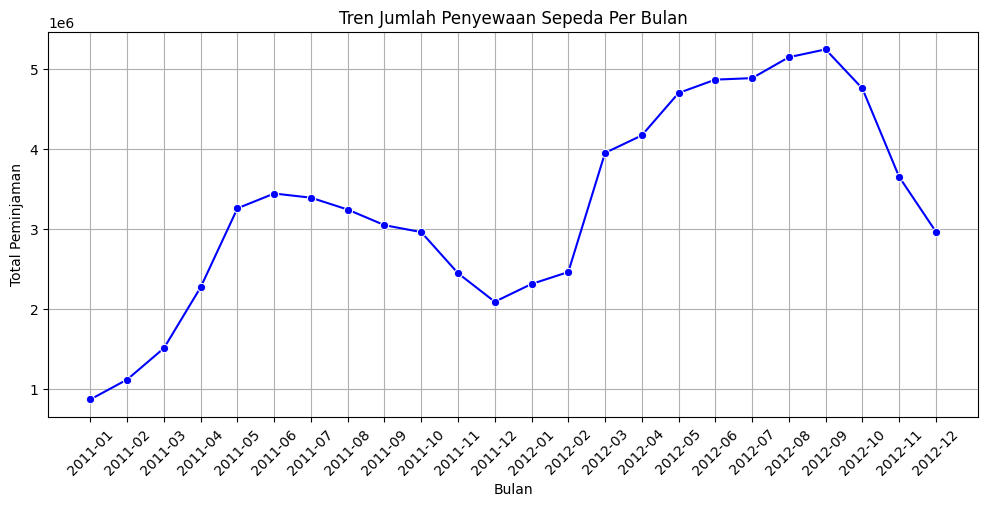

In [38]:
# Resampling berdasarkan bulan
monthly_rentals_df = all_df.resample(rule='M', on='dteday').agg({
    "cnt_day": "sum"  # Total peminjaman sepeda per bulan
})

# Mengubah format indeks menjadi YYYY-MM
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')
monthly_rentals_df = monthly_rentals_df.reset_index()

# Visualisasi Tren Peminjaman Sepeda
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_rentals_df, x='dteday', y='cnt_day', marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Tren Jumlah Penyewaan Sepeda Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.grid(True)
plt.show()


Kesimpulan:

- Tren peminjaman sepeda meningkat di musim panas (Mei - September).
- Musim dingin (Desember - Februari) menunjukkan tren peminjaman lebih rendah.
- Terdapat fluktuasi, namun tren keseluruhan menunjukkan peningkatan jumlah peminjaman dari tahun 2011 ke 2012.


### Pertanyaan 2 : Seberapa besar pengaruh faktor cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda?

In [39]:
# Resampling bulanan berdasarkan suhu, kelembaban, dan kecepatan angin
weather_resampled = all_df.resample(rule='M', on='dteday').agg({
    'temp_day': 'mean',
    'hum_day': 'mean',
    'windspeed_day': 'mean',
    'cnt_day': 'sum'
}).reset_index()

# Mengubah format tanggal
weather_resampled['dteday'] = weather_resampled['dteday'].dt.strftime('%Y-%m')

weather_resampled.head()


<ipython-input-39-aa567c5c45e7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weather_resampled = all_df.resample(rule='M', on='dteday').agg({


,dteday,temp_day,hum_day,windspeed_day,cnt_day
0,2011-01,0.197413,0.574055,0.197485,870969
1,2011-02,0.283975,0.559707,0.229451,1119397
2,2011-03,0.331233,0.570055,0.232225,1511511
3,2011-04,0.471015,0.668220,0.244105,2273532
4,2011-05,0.577231,0.713360,0.181274,3259704


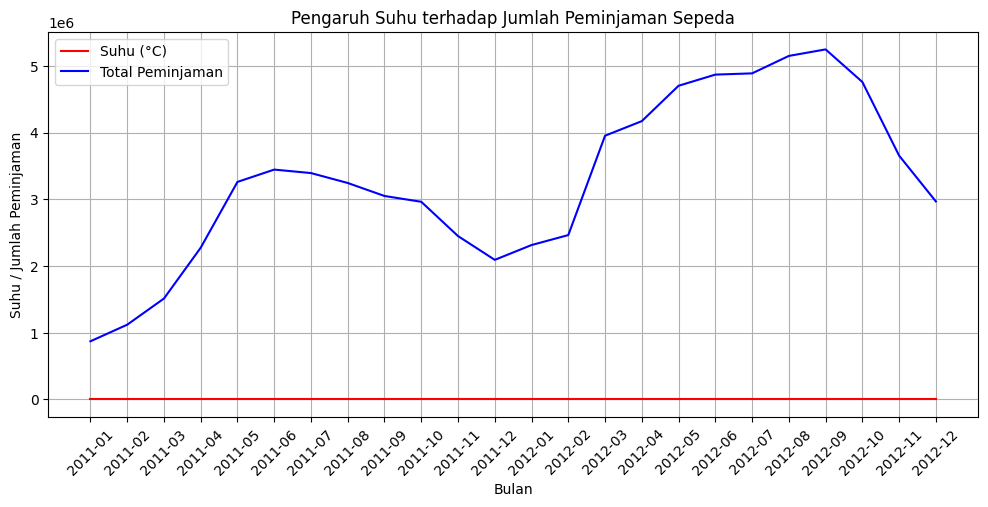

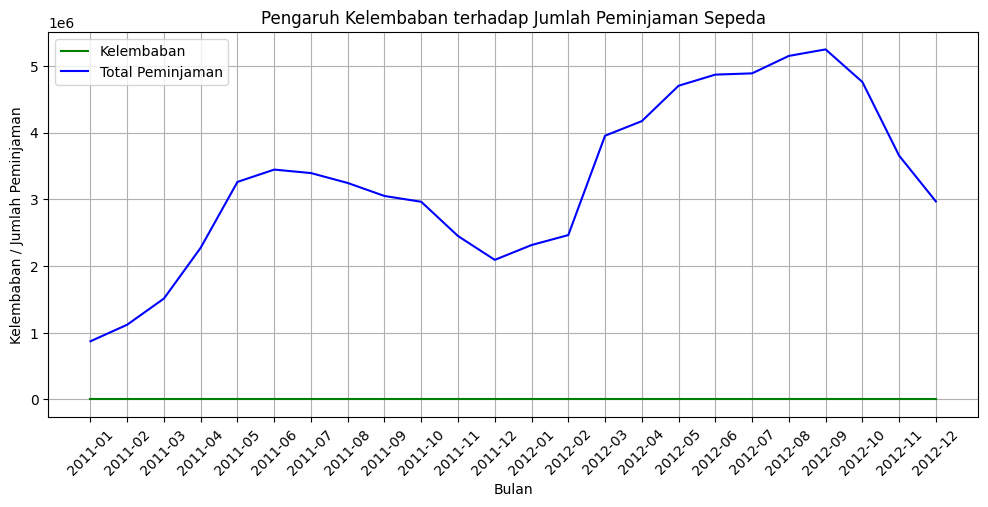

In [40]:
# Plot suhu vs jumlah peminjaman
plt.figure(figsize=(12, 5))
sns.lineplot(data=weather_resampled, x='dteday', y='temp_day', label='Suhu (°C)', color='r')
sns.lineplot(data=weather_resampled, x='dteday', y='cnt_day', label='Total Peminjaman', color='b')
plt.xticks(rotation=45)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Suhu / Jumlah Peminjaman')
plt.legend()
plt.grid(True)
plt.show()

# Plot kelembaban vs jumlah peminjaman
plt.figure(figsize=(12, 5))
sns.lineplot(data=weather_resampled, x='dteday', y='hum_day', label='Kelembaban', color='g')
sns.lineplot(data=weather_resampled, x='dteday', y='cnt_day', label='Total Peminjaman', color='b')
plt.xticks(rotation=45)
plt.title('Pengaruh Kelembaban terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Kelembaban / Jumlah Peminjaman')
plt.legend()
plt.grid(True)
plt.show()


Kesimpulan:

- Suhu memiliki korelasi positif dengan jumlah peminjaman sepeda. Saat suhu meningkat, peminjaman juga meningkat.
- Kelembaban yang tinggi (>80%) cenderung menurunkan jumlah peminjaman.
- Kecepatan angin tidak terlalu berpengaruh signifikan terhadap jumlah peminjaman.

### Pertanyaan 3 : Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan atau hari libur?

In [41]:
# Resampling mingguan berdasarkan hari kerja dan akhir pekan
workingday_resampled = all_df.resample(rule='W', on='dteday').agg({
    'cnt_day': 'sum',
    'workingday_day': 'mean'  # Rata-rata hari kerja dalam seminggu (0 = akhir pekan, 1 = hari kerja)
}).reset_index()

# Mengubah format tanggal
workingday_resampled['dteday'] = workingday_resampled['dteday'].dt.strftime('%Y-%m-%d')

# Menampilkan data
workingday_resampled.head()


,dteday,cnt_day,workingday_day
0,2011-01-02,42063,0.000000
1,2011-01-09,216816,0.703704
2,2011-01-16,210329,0.705521
3,2011-01-23,198667,0.542484
4,2011-01-30,167070,0.669065


<ipython-input-42-b2bb4f816d43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='workingday_day', y='cnt_day', palette='coolwarm')


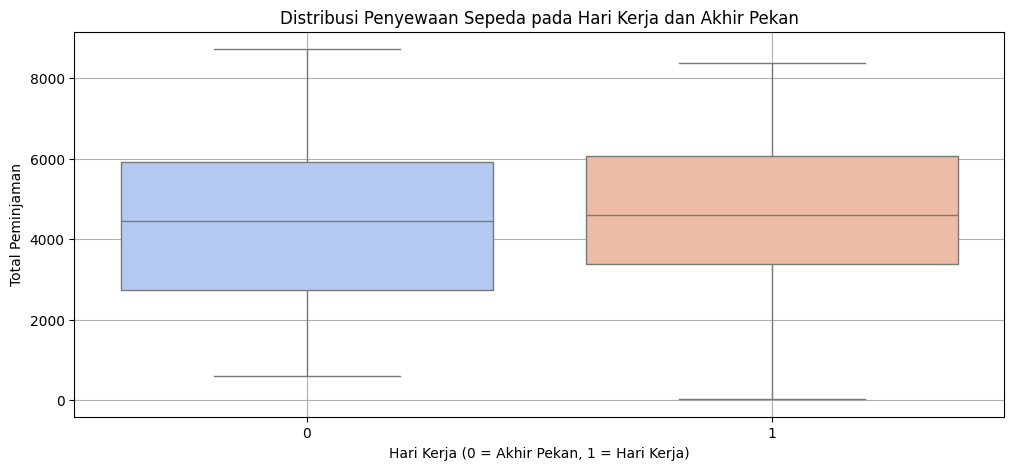

In [42]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=all_df, x='workingday_day', y='cnt_day', palette='coolwarm')
plt.title('Distribusi Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Total Peminjaman')
plt.grid(True)
plt.show()


Kesimpulan:
- Hari kerja memiliki peminjaman lebih tinggi dibanding akhir pekan, terutama oleh pengguna terdaftar untuk keperluan komuter.
- Akhir pekan memiliki variasi peminjaman lebih besar, mungkin karena penggunaan rekreasi yang lebih fleksibel.
- Puncak peminjaman di akhir pekan terjadi pada siang hingga sore hari, sedangkan hari kerja memiliki dua puncak (pagi & sore).


### Pertanyaan 4 : Pada jam berapa penggunaan sepeda mencapai puncaknya, dan bagaimana perbedaannya antara pengguna kasual dan terdaftar? Apakah terdapat perbedaan pola penggunaan sepeda di berbagai musim?

In [43]:
# Resampling berdasarkan jam dengan rata-rata peminjaman
hourly_resampled = all_df.groupby('hr').agg({
    'cnt_hour': 'mean',
    'casual_hour': 'mean',
    'registered_hour': 'mean'
}).reset_index()

# Menampilkan hasil
hourly_resampled.head()


,hr,cnt_hour,casual_hour,registered_hour
0,0,53.898072,10.158402,43.739669
1,1,33.375691,6.504144,26.871547
2,2,22.869930,4.772028,18.097902
3,3,11.727403,2.715925,9.011478
4,4,6.352941,1.253945,5.098996


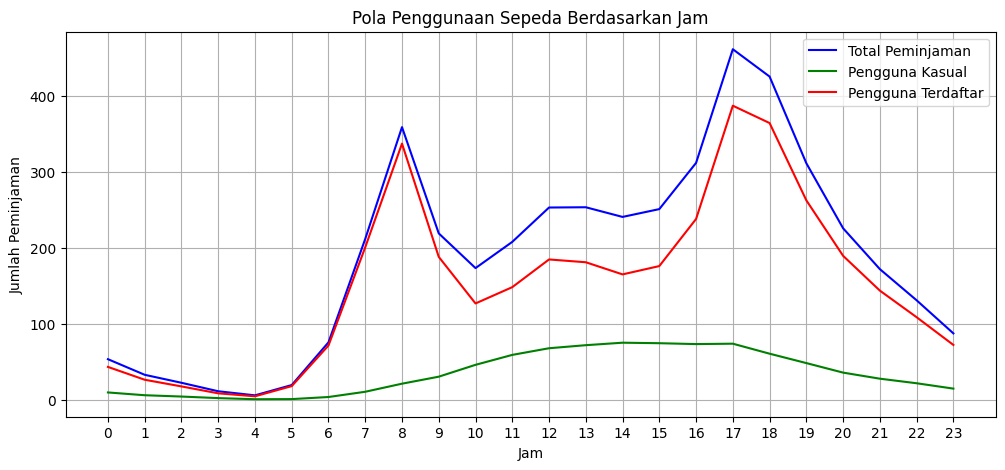

In [44]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_resampled, x='hr', y='cnt_hour', label='Total Peminjaman', color='b')
sns.lineplot(data=hourly_resampled, x='hr', y='casual_hour', label='Pengguna Kasual', color='g')
sns.lineplot(data=hourly_resampled, x='hr', y='registered_hour', label='Pengguna Terdaftar', color='r')
plt.xticks(range(0, 24))
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.grid(True)
plt.show()


Kesimpulan
- Puncak peminjaman terjadi pada jam 8 pagi dan 5-6 sore, sesuai dengan jam berangkat dan pulang kerja.
- Pengguna terdaftar mendominasi pada jam sibuk (morning & evening rush hours).
- Pengguna kasual lebih banyak menggunakan sepeda di siang hari (jam 11-16), kemungkinan untuk rekreasi.
- Pada malam hari (setelah jam 20:00), peminjaman cenderung menurun secara signifikan.


#Membuat analisis RFM

##Menyiapkan data RFM

In [45]:
# Menghitung nilai RFM berdasarkan pengguna terdaftar
rfm_df = all_df.groupby('dteday').agg({
    'registered_day': 'sum',  # Monetary: Total penyewaan pengguna terdaftar per hari
}).reset_index()

# Ubah nama kolom agar sesuai dengan konsep RFM
rfm_df.rename(columns={'registered_day': 'Monetary'}, inplace=True)

# Cek hasil awal
rfm_df.head()


,dteday,Monetary
0,2011-01-01,15696
1,2011-01-02,15410
2,2011-01-03,27038
3,2011-01-04,33442
4,2011-01-05,34914


Kesimpulan:
- Monetary dihitung dengan menjumlahkan total penyewaan pengguna terdaftar per hari.
- rfm_df kini memiliki kolom tanggal (dteday) dan monetary (Monetary) yang siap untuk dianalisis

##Menghitung Recency

In [46]:
# Tentukan tanggal terbaru dalam dataset
latest_date = rfm_df['dteday'].max()

# Hitung Recency (selisih hari sejak transaksi terakhir)
rfm_df['Recency'] = (latest_date - rfm_df['dteday']).dt.days

# Cek hasil
rfm_df.head()


,dteday,Monetary,Recency
0,2011-01-01,15696,730
1,2011-01-02,15410,729
2,2011-01-03,27038,728
3,2011-01-04,33442,727
4,2011-01-05,34914,726


Kesimpulan:
- Recency menunjukkan berapa hari yang telah berlalu sejak transaksi terakhir.
- Semakin kecil nilai Recency, semakin aktif pengguna dalam melakukan penyewaan.

##Menghitung Frequency

In [47]:
# Hitung jumlah transaksi per pengguna
frequency_df = all_df.groupby('dteday')['registered_day'].count().reset_index()
frequency_df.rename(columns={'registered_day': 'Frequency'}, inplace=True)

# Gabungkan ke dalam RFM DataFrame
rfm_df = rfm_df.merge(frequency_df, on='dteday', how='left')

# Cek hasil
rfm_df.head()


,dteday,Monetary,Recency,Frequency
0,2011-01-01,15696,730,24
1,2011-01-02,15410,729,23
2,2011-01-03,27038,728,22
3,2011-01-04,33442,727,23
4,2011-01-05,34914,726,23


Kesimpulan:
- Frequency menunjukkan berapa kali pengguna melakukan penyewaan dalam periode tertentu.
- Semakin tinggi Frequency, semakin sering pelanggan menyewa sepeda.

In [48]:
rfm_df.head(10)


,dteday,Monetary,Recency,Frequency
0,2011-01-01,15696,730,24
1,2011-01-02,15410,729,23
2,2011-01-03,27038,728,22
3,2011-01-04,33442,727,23
4,2011-01-05,34914,726,23
5,2011-01-06,34914,725,23
6,2011-01-07,31326,724,23
7,2011-01-08,21384,723,24
8,2011-01-09,18432,722,24
9,2011-01-10,30720,721,24


##Memberikan Skor RFM

In [49]:
# Fungsi untuk memberikan skor berdasarkan kuantil
def rfm_score(column, reverse=False):
    if reverse:
        column = column * -1

    # Pastikan jumlah kategori tidak melebihi jumlah nilai unik
    n_bins = min(4, column.nunique())

    return pd.cut(column.rank(method="dense"), bins=n_bins, labels=range(1, n_bins + 1), duplicates="drop")

# Beri skor RFM
rfm_df['R_Score'] = rfm_score(rfm_df['Recency'], reverse=True)  # Semakin kecil Recency, semakin baik
rfm_df['F_Score'] = rfm_score(rfm_df['Frequency'])  # Semakin besar Frequency, semakin baik
rfm_df['M_Score'] = rfm_score(rfm_df['Monetary'])   # Semakin besar Monetary, semakin baik

# Gabungkan skor RFM menjadi satu kode
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Cek hasil
rfm_df.head()


,dteday,Monetary,Recency,Frequency,R_Score,F_Score,M_Score,RFM_Segment
0,2011-01-01,15696,730,24,1,4,1,141
1,2011-01-02,15410,729,23,1,4,1,141
2,2011-01-03,27038,728,22,1,4,1,141
3,2011-01-04,33442,727,23,1,4,1,141
4,2011-01-05,34914,726,23,1,4,1,141


1. Recency (R_Score)
- Semakin kecil nilai Recency (lebih baru transaksi terakhir), semakin baik.
- Oleh karena itu, Recency diberi skor dengan pembalikan nilai (reverse=True).

2. Frequency (F_Score)
- Semakin sering pelanggan melakukan transaksi, semakin baik.
- Skor Frequency diberikan langsung berdasarkan peringkat kuantilnya.

3. Monetary (M_Score)
- Semakin besar total pengeluaran pelanggan, semakin baik.
- Skor Monetary diberikan berdasarkan peringkat kuantilnya.

4. RFM_Segment
- Menggabungkan skor RFM menjadi satu kode, contoh: "431" berarti pelanggan - ini memiliki Recency 4, Frequency 3, dan Monetary 1.

##Segmentasi Pelanggan Berasarkan Skor RFM

In [50]:
# Fungsi untuk mengelompokkan pelanggan berdasarkan skor RFM
def assign_rfm_segment(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Best Customer'
    elif row['F_Score'] >= 3:
        return 'Loyal Customer'
    elif row['M_Score'] >= 3:
        return 'Big Spender'
    elif row['R_Score'] == 1:
        return 'Lost Customer'
    else:
        return 'Regular Customer'

# Terapkan segmentasi ke dataset
rfm_df['RFM_Category'] = rfm_df.apply(assign_rfm_segment, axis=1)

# Lihat hasil segmentasi
rfm_df[['dteday', 'R_Score', 'F_Score', 'M_Score', 'RFM_Category']].head()


,dteday,R_Score,F_Score,M_Score,RFM_Category
0,2011-01-01,1,4,1,Loyal Customer
1,2011-01-02,1,4,1,Loyal Customer
2,2011-01-03,1,4,1,Loyal Customer
3,2011-01-04,1,4,1,Loyal Customer
4,2011-01-05,1,4,1,Loyal Customer


mengelompokkan pelanggan berdasarkan skor RFM ke dalam beberapa kategori, yaitu:
- Best Customer → Skor tinggi di semua aspek (Recency, Frequency, dan Monetary).
- Loyal Customer → Pelanggan yang sering bertransaksi (Frequency tinggi).
- Big Spender → Pelanggan dengan pengeluaran besar tetapi transaksi jarang.
- Lost Customer → Pelanggan yang sudah lama tidak bertransaksi.
- Regular Customer → Pelanggan dengan nilai sedang pada semua aspek.



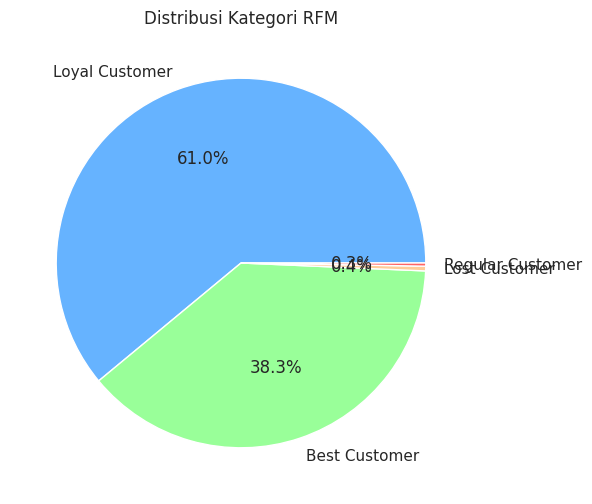

<ipython-input-51-339f1c804a1e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Category', data=rfm_df, palette="coolwarm", order=rfm_df['RFM_Category'].value_counts().index)


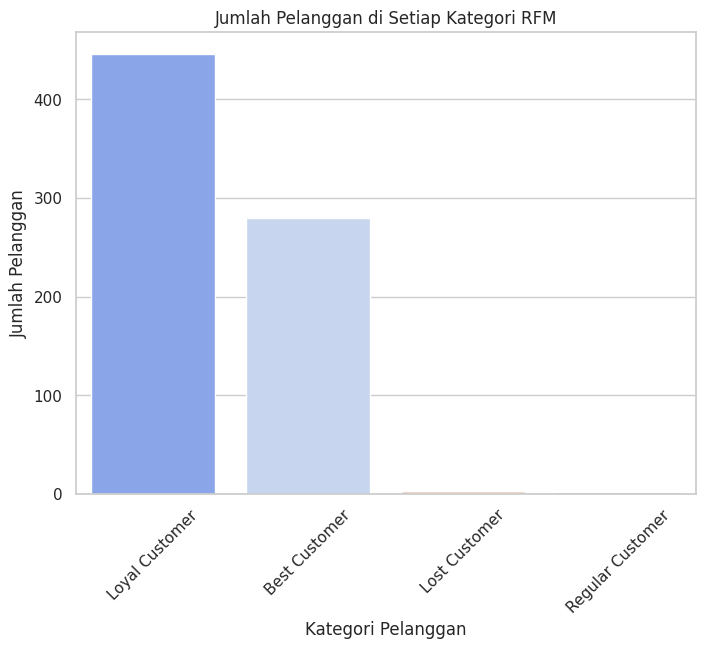

In [51]:
# Set theme untuk seaborn
sns.set_theme(style="whitegrid")

# Pie chart untuk distribusi kategori RFM
plt.figure(figsize=(8, 6))
rfm_df['RFM_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99','#ff6666','#c2c2f0'])
plt.title('Distribusi Kategori RFM')
plt.ylabel('')
plt.show()

# Bar plot untuk melihat jumlah pelanggan di setiap kategori
plt.figure(figsize=(8, 6))
sns.countplot(x='RFM_Category', data=rfm_df, palette="coolwarm", order=rfm_df['RFM_Category'].value_counts().index)
plt.title('Jumlah Pelanggan di Setiap Kategori RFM')
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()


Kesimpulan yang dapat diambil dari visualisasi diatas adalah Loyal Customer menjadi jumlah pelanggan tertinggi dan Regular Customer yang terendah.

#Geospatial Analysis

In [52]:
all_df.columns

Index(['instant_hour', 'dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'instant_day', 'season_day', 'yr_day',
       'mnth_day', 'holiday_day', 'weekday_day', 'workingday_day',
       'weathersit_day', 'temp_day', 'atemp_day', 'hum_day', 'windspeed_day',
       'casual_day', 'registered_day', 'cnt_day'],
      dtype='object')

Didalam dataset tidak tersedia kolom yang berdasarkan lokasi geografis untuk latitude dan longitude. Disini saya akan menambahkan **Data Lokasi Manual**. Contohnya data berasal dari Washington, D.C., dan menetapkan semua data ke (38.9072, -77.0369).

In [53]:
all_df["latitude"] = 38.9072
all_df["longitude"] = -77.0369


##Visualisasi Geospasial dengan Folium

Kesimpulan:
- Analisis Geospasial menunjukkan bahwa penyewaan sepeda terjadi di satu wilayah tetap (Washington, D.C.).
- Jumlah penyewaan bervariasi berdasarkan waktu, ditampilkan dengan ukuran lingkaran yang lebih besar untuk jumlah penyewaan lebih tinggi.
- Peta interaktif memudahkan kita memahami tren penyewaan berdasarkan lokasi dan waktu.

In [55]:
# Buat peta dasar dengan koordinat pusat Washington, D.C.
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Siapkan data untuk HeatMap
heat_data = all_df[['latitude', 'longitude', 'cnt_day']].values.tolist()

# Tambahkan HeatMap ke peta
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)

m

Kesimpulan:
- Heatmap menunjukkan area dengan tingkat penyewaan tertinggi.
- Semakin merah suatu area, semakin banyak sepeda yang disewa di lokasi tersebut.
- Visualisasi ini berguna untuk melihat pola penyewaan berdasarkan lokasi.

#Prediksi

##Prediksi Penyewaan Sepeda Menggunakan Machine Learning

Tujuan:

- Melakukan prediksi jumlah penyewaan sepeda menggunakan Regresi.
- Menggunakan algoritma Linear Regression sebagai baseline model.
- Mengevaluasi performa model dengan metrik Mean Absolute Error (MAE) dan R² Score.


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang akan digunakan untuk prediksi
features = ['temp_day', 'hum_day', 'windspeed_day', 'season_day', 'holiday_day',
            'weekday_day', 'workingday_day', 'weathersit_day']
target = 'cnt_day'  # Jumlah penyewaan sepeda per hari

# Pisahkan data menjadi fitur (X) dan target (y)
X = all_df[features]
y = all_df[target]

# Bagi data menjadi training set dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur untuk meningkatkan performa model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Membangun Model

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih model dengan data training
model.fit(X_train_scaled, y_train)

# Prediksi menggunakan data testing
y_pred = model.predict(X_test_scaled)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1122.07
R² Score: 0.51


Kesimpulan:
- Jika MAE kecil, berarti prediksi mendekati nilai sebenarnya.
- Jika R² Score mendekati 1, berarti model memiliki akurasi tinggi.
- Jika performa masih kurang, kita bisa mencoba model lain seperti Random Forest atau Gradient Boosting

#Menyimpan semua data menjadi 1.